# Text to CSV

## **Task**: Convert disorganized text file into a neat CSV file
## **Input files**: gre_vocab_text.txt
## **Output file**: gre_vocab_csv.csv

In [2]:
import re

file = open('/home/hacky/Desktop/Applied-AI/Projects/Text2CSV/gre_vocab_text.txt', 'r', errors = 'replace')

dictionary = {}
key_words_list = []
key_meanings_list = []
key_eg_sentences_list = []
words_list = []
meanings_list = []
eg_sentences_list = []

### Subtask 1. Forming a Regex to match a number and the word next to it.
Each topic has a number preceding to it. We'll use Regex to extract topics from the text.

In [3]:
# Regex to match word number and word itself (Eg. 1. Angry)
            
numRegex = re.compile(r'(\d)(\d*)?(\.)(\s*)(\w*)') # Regex can be improved
matched_strings_list = []

for groups in numRegex.findall(file.read()):
    item = ''.join(groups)
    clean_item = item.replace('\n', '')
    matched_strings_list.append(clean_item)
    
print(matched_strings_list)
# file.close()

['1. Angry', '2. Avoid', '3. Awkward', '4. Waste', '5. Beginning', '6. Burn', '7. Displaying', '8. Flexible', '9. Having', '10.Horrifying', '11.Inclination', '12.Prediction', '13.Separated', '14.Sign', '15.Take', '16.Talk', '17.Teacher', '18.Unexpected', '19.Very', '20.Bitter', '21.Bring', '22.Cautions', '23.Complain', '24.Express', '25.Danger', '26.Escape', '27.Explain', '28.Hate', '29.Mock', '30.Old', '31.Praise', '32.Rebellious', '33.Reduce', '34.Time', '35.To', '36.Troubled', '37.Warning', '38.Add', '39.Aggressive', '40.Agreement', '41.Argue', '42.Biased', '43.Distributed', '44.Dominating', '45.Equality', '46.Excessive', '47.Including', '48.Indifferent', '49.Insulting', '50.Make', '51.Narrow', '52.Not', '53.Overly', '54.Pampering', '55.Suppress', '56.Surprise', '57.Calm', '58.Crucial', '59.Difficult', '60.Express', '61.Happy', '62.Hardworking', '63.Irregular', '64.Lacking', '65.Never', '66.Ordinary', '67.Sad', '68.Short', '69.Sulking', '70.To', '71.Unimportant', '72.Excess', '73.Dr

### Subtask 2: Obtaining a list of lines as strings from the text file.

In [6]:
# Form a list of lines in the file
file = open('/home/hacky/Desktop/Applied-AI/Projects/Text2CSV/gre_vocab_text.txt', 'r', errors = 'replace')
lines_list = file.readlines()
lines_list

['1. Angry\n',
 'Enrage=make violently angry.\n',
 'Example: She was Enraged at his stupidity.\n',
 'Fume=feel or express great anger.\n',
 'Example: She sat in the car, silently Fuming at the traffic jam.\n',
 '\n',
 'Glower=have an angry and sullen look on face.\n',
 'Example: The entire ninth grade turned to Glower at us.\n',
 'Incense=make or get angry.\n',
 'Example: Incensed, Mr. John demanded on national television that Ms. Rihana be given a\n',
 'year prison sentence.\n',
 'Infuriate=make someone angry.\n',
 'Example: Her silence Infuriated him even more.\n',
 'Irate=very angry.\n',
 'Example: The employee wrote an Irate letter to the editor.\n',
 'Ire=anger.\n',
 'Example: If you routinely steal your neighbors newspaper, dont be surprised to be on the\n',
 'receiving end of his Ire.\n',
 'Livid=angry.\n',
 'Example: Dad will be Livid when he finds this out.\n',
 'Rabid=very angry.\n',
 'Example: The fans became Rabid when their team lost the match.\n',
 'Seethe=very angry.\n',

In [162]:
clean_lines_list = []
for line in lines_list:
    clean_line = line.replace('\n', '')
    clean_lines_list.append(clean_line)
    
for line in clean_lines_list:
    if line == '':
        del clean_lines_list[clean_lines_list.index(line)] #provide a string to find an index i.e. clean_lines_list.index('1. Angry')

clean_lines_list

['1. Angry',
 'Enrage=make violently angry.',
 'Example: She was Enraged at his stupidity.',
 'Fume=feel or express great anger.',
 'Example: She sat in the car, silently Fuming at the traffic jam.',
 'Glower=have an angry and sullen look on face.',
 'Example: The entire ninth grade turned to Glower at us.',
 'Incense=make or get angry.',
 'Example: Incensed, Mr. John demanded on national television that Ms. Rihana be given a',
 'year prison sentence.',
 'Infuriate=make someone angry.',
 'Example: Her silence Infuriated him even more.',
 'Irate=very angry.',
 'Example: The employee wrote an Irate letter to the editor.',
 'Ire=anger.',
 'Example: If you routinely steal your neighbors newspaper, dont be surprised to be on the',
 'receiving end of his Ire.',
 'Livid=angry.',
 'Example: Dad will be Livid when he finds this out.',
 'Rabid=very angry.',
 'Example: The fans became Rabid when their team lost the match.',
 'Seethe=very angry.',
 'Example: He marched off, seething with frustrati

### Subtask 3: Extracting words, meanings, and example sentences separately and adding them corresponding list. 


In [26]:
for line in clean_lines_list:
    if '=' in line:
        string = line
        index = string.index('=')
        word = string[:index]
        meaning = string[index+1:]
        
        words_list.append(word)
        meanings_list.append(meaning)
    elif ':' in line:
        string = line
        index = string.index(':')
        example = string[index+1:]
        eg_sentences_list.append(example)

Extraction should be done in a manner such that every word (and its aspects) of the particular key had to be accumulated together as one value for the key.

       dictionary = {'Topic/Key' : [('Word', 'Meaning', 'Example'),\
                                    ('Another word', 'its meaning', 'its sentence), ...], \
                     'Another Key' : [('Word', 'Meaning', 'Example'), ...]
                     ...}
                                      
                     
                                       

Thus we are planning to collect each word, meaning and sentence of each key inside a separate list enclosed by another list, say key-list.

    key_words_list = [ ['Word1', 'Word2', 'Word3', ... ], ['Word1', 'Word2', 'Word3', ...]
                            # for key 1                          # for key 2
                  
    key_meanings_list = [ ['Meaning1', 'Meaning2', 'Meaning3', ...],  ['Meaning1', 'Meaning2', ...]
                                 # for key 1                                # for key 2
                             
    key_eg_sentences_list = [ ['Example1', 'Example2', 'Example3', ... ], \
                                       # for key 1
                              ['Example1', 'Example2', 'Example3', ... ], ... ]
                                       # for key 2
                                       

In [27]:
for line in clean_lines_list:
    if '=' in line: # words and meanings extraction part
        string = line
        index = string.index('=')
        word = string[:index]
        meaning = string[index+1:]
        
        words_list.append(word)
        meanings_list.append(meaning)
    
    elif ':' in line: # examples extractions part
        string = line
        index = string.index(':')
        example = string[index+1:]
        eg_sentences_list.append(example)
        
    else:
        key_words_list.append(words_list)
        key_meanings_list.append(meanings_list)
        key_eg_sentences_list.append(eg_sentences_list)
        
        words_list = []
        meanings_list = []
        eg_sentences_list = []

Here I made the wrong assumption that only two conditions ('=' and ':') existed in the text. We'll fix that later.

### Subtask 4: Creating values for keys using Zip function and parameters unpacking.

I an not entirely sure about how to combine those lists. Then I got to know about 'Zip' function and 'Parameter unpacking'.

zip() function zips the corresponding lists or values within the lists and encloses them in a tuple. The tuple inside the lists are then converted to lists for unpacking and further zipping

Packing and unpacking: https://stackoverflow.com/questions/29139350/difference-between-ziplist-and-ziplist

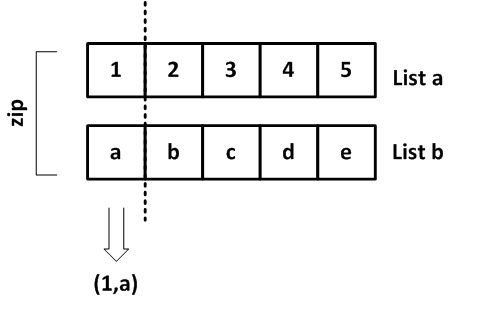

In [56]:
from IPython.display import Image
Image("https://3.bp.blogspot.com/-22SqNbJlTf4/WJUlqui2kwI/AAAAAAAADzE/32Emcx9LdmkE7msm9Lz3BzLjNd6tRINwwCLcB/s1600/%25EC%25BA%25A1%25EC%25B2%2598.PNG")

In [57]:
# Zip function example
a = [1, 2, 3, 4, 5]
b = ['a', 'b', 'c', 'd', 'e']

for x,y in zip(a,b):
    print(x,y)

1 a
2 b
3 c
4 d
5 e


In [114]:
# one more example of zip function
# procedure
# 1. Zip lists
# 2. Covert tuples to lists
# 3. Unzip it

list1 = [['a', 'b'], ['c', 'd', 'e', 'f']]
list2 = [[1, 2], [3, 4, 5, 6]]
list3 = [['A', 'B'], ['C', 'D', 'E', 'F']]
list4 = []
list5 = []

values = zip(list1, list2, list3)
result = list(values)

print('Result of zipping is', result)

Result of zipping is [(['a', 'b'], [1, 2], ['A', 'B']), (['c', 'd', 'e', 'f'], [3, 4, 5, 6], ['C', 'D', 'E', 'F'])]


In [115]:
for tuples in result:
    litup = list(tuples)
    list4.append(litup)
    
print('List 4 is: ', list4)

List 4 is:  [[['a', 'b'], [1, 2], ['A', 'B']], [['c', 'd', 'e', 'f'], [3, 4, 5, 6], ['C', 'D', 'E', 'F']]]


In [126]:
for lists in list4:
    values3 = list(zip(*lists))    
    if values3 not in list5:
        list5.append(values3)

list5

[[('a', 1, 'A'), ('b', 2, 'B')],
 [('c', 3, 'C'), ('d', 4, 'D'), ('e', 5, 'E'), ('f', 6, 'F')]]

In [128]:
list5[1]

[('c', 3, 'C'), ('d', 4, 'D'), ('e', 5, 'E'), ('f', 6, 'F')]

### Subtask 5: Assigning values to the keys in the dictionary.

In [163]:
keys = ['First', 'Second']
dictionary = {}

for i in range(len(keys)):
    dictionary[keys[i]] = list5[i]
dictionary

{'First': [('a', 1, 'A'), ('b', 2, 'B')],
 'Second': [('c', 3, 'C'), ('d', 4, 'D'), ('e', 5, 'E'), ('f', 6, 'F')]}

## **back to the subtask 3**

While debugging, I observed that some words has examples in two lines instead of one. According to my logic since there's no ':' sign or '=' sign, the contents in the line would not be treated as a part of the example.
So, back to the data extraction part.

In [164]:
def hasNumbers(inputString): # check if line contains number, i.e. 1. Angry
    return bool(re.search(r'\d', inputString))

In [165]:
for line in clean_lines_list:
    
    if '=' in line: # words and meanings extraction part
        string = line
        index = string.index('=')
        word = string[:index]
        meaning = string[index+1:]
        words_list.append(word)
        meanings_list.append(meaning)
    
    elif ':' in line: # examples extractions part
        string = line
        index = string.index(':')
        example = string[index+1:]        
        eg_sentences_list.append(example)
        
    elif hasNumbers(line) == True:
        key_words_list.append(words_list)
        key_meanings_list.append(meanings_list)
        key_eg_sentences_list.append(eg_sentences_list)        
        words_list = []
        meanings_list = []
        eg_sentences_list = []
        
    else:
        string = eg_sentences_list[-1] # in case of incomplete sentence, access previous sentence in list, combine it with next sentence and replace it with old one.
        string = string + ' ' + line
        del eg_sentences_list[-1]
        eg_sentences_list.append(string)

IndexError: list index out of range

This will collect second line of the example if all other condition fails, combines it with first line and then add it to corresponding list.

Unfortunately it didn't work out and throwed error: list index out of range

In [166]:
# debugging
for i, line in enumerate(clean_lines_list):
    print("Line no: ", i)
    
    if '=' in line: # words and meanings extraction part
        string = line
        index = string.index('=')
        word = string[:index]
        meaning = string[index+1:]
        words_list.append(word)
        meanings_list.append(meaning)
    
    elif ':' in line: # examples extractions part
        string = line
        index = string.index(':')
        example = string[index+1:]        
        eg_sentences_list.append(example)
        
    elif hasNumbers(line) == True:
        key_words_list.append(words_list)
        key_meanings_list.append(meanings_list)
        key_eg_sentences_list.append(eg_sentences_list)        
        words_list = []
        meanings_list = []
        eg_sentences_list = []
        
    else:
        string = eg_sentences_list[-1] # in case of incomplete sentence, access previous sentence in list, combine it with next sentence and replace it with old one.
        string = string + ' ' + line
        del eg_sentences_list[-1]
        eg_sentences_list.append(string)

Line no:  0
Line no:  1
Line no:  2
Line no:  3
Line no:  4
Line no:  5
Line no:  6
Line no:  7
Line no:  8
Line no:  9
Line no:  10
Line no:  11
Line no:  12
Line no:  13
Line no:  14
Line no:  15
Line no:  16
Line no:  17
Line no:  18
Line no:  19
Line no:  20
Line no:  21
Line no:  22
Line no:  23
Line no:  24
Line no:  25
Line no:  26
Line no:  27
Line no:  28
Line no:  29
Line no:  30
Line no:  31
Line no:  32
Line no:  33
Line no:  34
Line no:  35
Line no:  36
Line no:  37
Line no:  38
Line no:  39
Line no:  40
Line no:  41
Line no:  42
Line no:  43
Line no:  44
Line no:  45
Line no:  46
Line no:  47
Line no:  48
Line no:  49
Line no:  50
Line no:  51
Line no:  52
Line no:  53
Line no:  54
Line no:  55
Line no:  56
Line no:  57
Line no:  58
Line no:  59
Line no:  60
Line no:  61
Line no:  62
Line no:  63
Line no:  64
Line no:  65
Line no:  66
Line no:  67
Line no:  68
Line no:  69
Line no:  70
Line no:  71
Line no:  72
Line no:  73
Line no:  74
Line no:  75
Line no:  76
Line no: 

IndexError: list index out of range

Interestingly while debugging, I came to know that error occured at line 1717. Some keys were not by their numbers too.

In [167]:
# updated code
for i, line in enumerate(clean_lines_list):
    
    if '=' in line: # words and meanings extraction part
        string = line
        index = string.index('=')
        word = string[:index]
        meaning = string[index+1:]
        words_list.append(word)
        meanings_list.append(meaning)
        
    elif ':' in line: # extract examples
        string = line
        index = string.index(':')
        
        if '=' not in clean_lines_list[i+1]: # for meanings > 1 lines 
            # i.e : Example: This is my
            #                name.
            if hasNumbers(clean_lines_list[i+1]) == False:
                example = string[index+1:] + clean_lines_list[i+1]
                eg_sentences_list.append(example)
            
            else: 
                example = string[index+1:]
                eg_sentences_list.append(example)
    
    elif hasNumbers(line) == True: # extract topics
        if i == 0:
            continue
        key_words_list.append(words_list)
        key_meanings_list.append(meanings_list)
        key_eg_sentences_list.append(eg_sentences_list)
        words_list = [] # reset all three lists for new key
        meanings_list = []
        eg_sentences_list = []

IndexError: list index out of range

This too worked well, till line 4428.

The whole program worked just fine on the clean list, which was void of new lines and spaces. When I compared the last line of list and last of the text. It was same. 

Thus this program worked well till the end, after that none of the condition make sense thus it broke.

In [170]:
# more updated code
for i, line in enumerate(clean_lines_list):
    
    if '=' in line: # words and meanings extraction part
        string = line
        index = string.index('=')
        word = string[:index]
        meaning = string[index+1:]
        words_list.append(word)
        meanings_list.append(meaning)
        
    elif ':' in line: # extract examples
        string = line
        index = string.index(':')
        
        if i < 4428:
            if '=' not in clean_lines_list[i+1]: # for meanings > 1 lines 
                # i.e : Example: This is my
                
                
                
                #                name.
                if hasNumbers(clean_lines_list[i+1]) == False:
                    example = string[index+1:] + clean_lines_list[i+1]
                    eg_sentences_list.append(example)

                else: 
                    example = string[index+1:]
                    eg_sentences_list.append(example)
    
    elif hasNumbers(line) == True: # extract topics
        if i == 0:
            continue
        key_words_list.append(words_list)
        key_meanings_list.append(meanings_list)
        key_eg_sentences_list.append(eg_sentences_list)
        words_list = [] # reset all three lists for new key
        meanings_list = []
        eg_sentences_list = []

### EXTRA Submodule 6: Modification

In [174]:
# modifying hasNumbers function to hasNumbersDot() function

# def hasNumbers(inputString):
#     return bool(re.search(r'\d', inputString)

def hasNumbersDot(inputString):
    '''
        returns 'True' if it matches lines contrainig a number and a word at the beginning of the line
    '''
    return bool(re.search(r'^((\d)+?(\.))', inputString))

In [201]:
# replacing the regrex condition and the code for obtaining keys from the clean list.

matched_strings_list = []

for i, line in enumerate(clean_lines_list):
    if hasNumbersDot(line) == True:
        string = line
        index = string.index('.')
        
        # to modify strings like:
        # 104.                               
        # To accept/ give in/ agree
        if len(string[index+1:]) == 0:                              
            string = line + ' ' + clean_lines_list[i+1]
            matched_strings_list.append(string)
        else:
            matched_strings_list.append(line)

In [203]:
# combining if condition in the example extraction part
# prior to this modification the last example sentence could not be extracted from each key
for i, line in enumerate(clean_lines_list):
    
    if '=' in line: # words and meanings extraction part
        string = line
        index = string.index('=')
        word = string[:index]
        meaning = string[index+1:]
        words_list.append(word)
        meanings_list.append(meaning)
        
    elif ':' in line: # extract examples
        string = line
        index = string.index(':')
        
        if i < 4428:
            if '=' not in clean_lines_list[i+1] and hasNumbers(clean_lines_list[i+1]) == False: 
                # for meanings > 1 lines 
                # i.e : Example: This is my
                #                name.
                    example = string[index+1:] + clean_lines_list[i+1]
                    eg_sentences_list.append(example)

            else: 
                example = string[index+1:]
                eg_sentences_list.append(example)

    elif hasNumbers(line) == True: # extract topics
        if i == 0:
            continue
        key_words_list.append(words_list)
        key_meanings_list.append(meanings_list)
        key_eg_sentences_list.append(eg_sentences_list)
        words_list = [] # reset all three lists for new key
        meanings_list = []
        eg_sentences_list = []

In [205]:
# for dictionary key assignment
zipped_list = zip(key_words_list, key_meanings_list, key_eg_sentences_list)

refined_zipped_list = []

for tuples in zipped_list: # convert tuples into list
    litup = list(tuples)
    refined_zipped_list.append(litup)
    
values_list = []
for lists in refined_zipped_list: # unzips the corresponding values and return as a list
    values = list(zip(*lists))
    values_list.append(values)

In [206]:
import csv

In [207]:
with open('gre.csv', 'w') as f:
    w = csv.writer(f, delimiter = ',')
    w.writerow(['TOPIC', 'WORD', 'MEANING', 'SENTENCE'])
    
    for Topic, Words in dictionary.items():
        for Word, Meaning, Sentence in Words:
            w.writerow([Topic, Word, Meaning, Sentence,])
            w.writerow('\n')
f.close()

## Finally combining all snippets together

In [216]:
import re, csv

file = open('/home/hacky/Desktop/Applied-AI/Projects/Text2CSV/gre_vocab_text.txt', 'r', errors = 'replace')

dictionary = {}
key_words_list = []
key_meanings_list = []
key_eg_sentences_list = []
words_list = []
meanings_list = []
eg_sentences_list = []



In [217]:
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))

def hasNumbersDot(inputString):
    return bool(re.search(r'^((\d)+?(\.))', inputString))

In [218]:
# create a list of lines in the file

lines_list = file.readlines()

clean_lines_list = []
for line in lines_list:
    clean_line = line.replace('\n', '')
    clean_lines_list.append(clean_line)
    
for line in clean_lines_list:
    if line == '':
        del clean_lines_list[clean_lines_list.index(line)] #provide a string to find an index i.e. clean_lines_list.index('1. Angry')

In [219]:
# extract keys i.e. 1. Angry
matched_strings_list = []

for i, line in enumerate(clean_lines_list):
    if hasNumbersDot(line) == True:
        string = line
        index = string.index('.')
        
        # to modify strings like:
        # 104.                               
        # To accept/ give in/ agree
        if len(string[index+1:]) == 0:                              
            string = line + ' ' + clean_lines_list[i+1]
            matched_strings_list.append(string)
        else:
            matched_strings_list.append(line)

In [220]:
for i, line in enumerate(clean_lines_list):
    
    if '=' in line: # words and meanings extraction part
        string = line
        index = string.index('=')
        word = string[:index]
        meaning = string[index+1:]
        words_list.append(word)
        meanings_list.append(meaning)
        
    elif ':' in line: # extract examples
        string = line
        index = string.index(':')
        
        if i < 4428:
            if '=' not in clean_lines_list[i+1] and hasNumbers(clean_lines_list[i+1]) == False: 
                # for meanings > 1 lines 
                # i.e : Example: This is my
                #                name.
                    example = string[index+1:] + clean_lines_list[i+1]
                    eg_sentences_list.append(example)

            else: 
                example = string[index+1:]
                eg_sentences_list.append(example)

    elif hasNumbers(line) == True: # extract topics
        if i == 0:
            continue
        key_words_list.append(words_list)
        key_meanings_list.append(meanings_list)
        key_eg_sentences_list.append(eg_sentences_list)
        words_list = [] # reset all three lists for new key
        meanings_list = []
        eg_sentences_list = []

In [221]:
# for dictionary key assignment
zipped_list = zip(key_words_list, key_meanings_list, key_eg_sentences_list)

refined_zipped_list = []

for tuples in zipped_list: # convert tuples into list
    litup = list(tuples)
    refined_zipped_list.append(litup)
    
values_list = []
for lists in refined_zipped_list: # unzips the corresponding values and return as a list
    values = list(zip(*lists))
    values_list.append(values)

In [225]:
for i in range(278): # 279 keys
    dictionary[matched_strings_list[i]] = values_list[i]
   
file.close()

In [227]:
with open('gre_vocab_csv.csv', 'w') as f:
    w = csv.writer(f, delimiter = ',')
    w.writerow(['TOPIC', 'WORD', 'MEANING', 'SENTENCE'])
    
    for Topic, Words in dictionary.items():
        for Word, Meaning, Sentence in Words:
            w.writerow([Topic, Word, Meaning, Sentence,])
            w.writerow('\n')
f.close()